# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнила студентка гр. 0382 Деткова Анна. Вариант 29

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения

### Определения:
* _n-клика_ - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n.

* _n-клан_ - n-клика, в которой геодезическое расстояние между всеми узлами в подграфе не превышает n для путей внутри подграфа.

* _n-клуб_ - максимальный подграф диаметра меньше либо равно n.

* _k-ядро_ - максимальный подграф, в котором каждая вершина связана минимум с _k_ другими вершинами этого же подграфа.

* _k-плекс_ - максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен с не менее чем с $g_s - k$ узлами подграфа.

* _Полупуть_ от узла _i_ до узла _j_ - последовательность различных узлов, где все последовательные пары узлов соединены дугой от первого ко второму или наоборот.

* _Модулярность_ - характеристика структуры сети, в частности степень кластеризации узлов, когда внутри кластера наблюдается много узлов, а между кластерами мало узлов. показатель модулярности определяется как разница между долей связей внутри группы и ожидаемой доли связей, если бы связи были размещены случайно.

* _Сеть аффилированности_ - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определенном событии. Сеть состоит из двух измерений.

* _Гиперграф_ - обобщение понятия графа: гиперграф состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причем ни одно подмножество не является пустым.

$\cal {H = H(A, B)}$, где $\cal{A} = \{a_1, ..., a_n\}$ - множество объектов; $\cal{B} = \{b_1, ..., b_n\}$ - множество ребер

* _Двойственный гипеграф_ для гипперграфа $\cal {H = H(A, B)}$:

$\cal {H* = H(B, A)}$, где $\cal{A} = \{a_1, ..., a_n\}$ - множество ребер; $\cal{B} = \{b_1, ..., b_n\} - множество объектов$

* Матрица соучастия акторов:

$X^{\cal{N}} = \{x_{ij}^{\cal{N}} \}$

$x_{ij}^{\cal{N}} = \sum_{k = 1}^{h} a_{ik}a_{jk}$

* Матрица перекрытия событий:

$X^{\cal{M}} = \{x_{kl}^{\cal{M}} \}$

$x_{kl}^{\cal{M}} = \sum_{i = 1}^{g} a_{ik}a_{jl}$

* _Степень участия_ - количество событий, с которым связан каждый актор.

$a_{i+} = \sum_{j = 1}^{h} a_{ij} = x_{ii}^{\cal{N}}$

* _Размер событий:_

$a_{+j} = \sum_{i = 1}^{g} a_{ij} = x_{ii}^{\cal{M}}$

* _Средний размер событий_ - среднее количество акторов в каждом событии или средняя степень узлов, прндставляющих события в двудольном графе.

$\overline {a}_{ij} = \frac{1}{h} \sum_{j = 1}^{h} x_{jj}^{\cal{M}}$

* _Связная сеть аффилированности_ - сеть, в которой все пары узлов достижимы.

* _Диаметр аффилированной сети_ -длина самого длинного пути между любой парой акторов и/или событий.

* _Клика уровня с в взвешенном графе_ - максимальный полный подграф из трех или более узлов, все из которых являются смежными на уровне _c_, то есть между всеми парами узлов есть ребра со значениями, большими или равными _c_.

* _Клика уровня с для отношения соучастия_ - подграф, в котором все пары акторов совместно участвуют не менее чем в _c_ событиях.

* _Клика уровня с для отношения перекрытия_ - подграф, в котором все пары событий имеют не менее _с_ общих членов.

### Свойства сетей аффилированности:
1. Количество перекрывающихся связей между событиями частично зависит от количества событий, к которым принадлежат акторы.

2. Количество связей соучастия между акторами частично зависит от размера событий.

3. Актор, принадлежащий $a_{i+}$ событиям, создает $C_{a_{i+}}^2$ парных связей между событиями.

4. Событие с участиеми $a_{+j}$ участников создает $C_{a_{+о}}^2$ связей между парами акторов.

5. Плотность для дихотомического отношения - доля присутствующих связей.

6. Плоность для ценностных отношений - среднее значение связей.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Язык программирования – R.

### 0. Установим  требуемые пакеты и подключим их. 

In [ ]:
install.packages("igraph")
library(igraph)

### 1. Из файла florentine_business.csv (нечётный вариант) была извлечена социоматрица с помощью функции read.csv(). Сеть была отображена с помощью алгоритма Камада-Каваи по укладке сети.

In [ ]:
data <- read.csv('florentine_business.csv', header = TRUE)
# представили как матрицу для дальнейшего удобства в работе
data <- as.matrix(data)
rownames(data) <- colnames(data)

graph <-  graph.adjacency(data, mode = "undirected")
plot(graph, edge.arrow.size = 0.6, layout=layout_with_kk, main = "Kamada-Kawai")

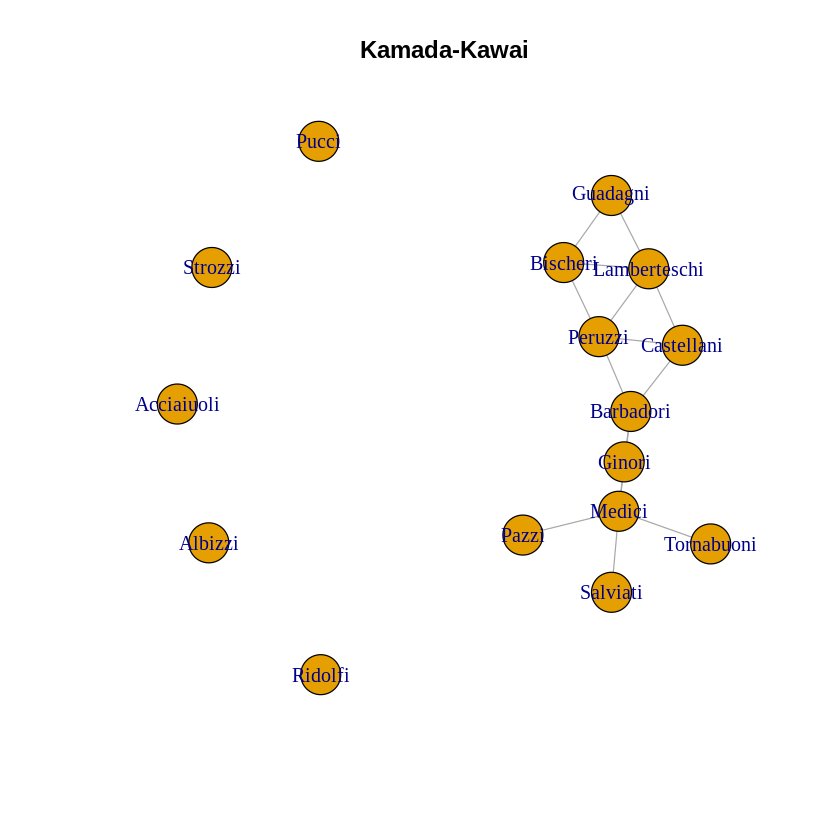

### 2. Исследовать данную сеть на предмет подгрупп с помощью:
* n-клик;
* n-кланов;
* n-клубов;
* k-ядер;
* k-плексов.

Указать какие подгруппы поучились. Сделать выводы.

In [14]:
#n-клики
n_cliques<-cliques(graph)
n_cliques


[[1]]
+ 1/16 vertex, named, from 5b97664:
[1] Medici

[[2]]
+ 1/16 vertex, named, from 5b97664:
[1] Peruzzi

[[3]]
+ 1/16 vertex, named, from 5b97664:
[1] Guadagni

[[4]]
+ 1/16 vertex, named, from 5b97664:
[1] Strozzi

[[5]]
+ 1/16 vertex, named, from 5b97664:
[1] Ridolfi

[[6]]
+ 1/16 vertex, named, from 5b97664:
[1] Pucci

[[7]]
+ 1/16 vertex, named, from 5b97664:
[1] Albizzi

[[8]]
+ 1/16 vertex, named, from 5b97664:
[1] Acciaiuoli

[[9]]
+ 1/16 vertex, named, from 5b97664:
[1] Lamberteschi

[[10]]
+ 2/16 vertices, named, from 5b97664:
[1] Guadagni     Lamberteschi

[[11]]
+ 2/16 vertices, named, from 5b97664:
[1] Lamberteschi Peruzzi     

[[12]]
+ 1/16 vertex, named, from 5b97664:
[1] Barbadori

[[13]]
+ 2/16 vertices, named, from 5b97664:
[1] Barbadori Peruzzi  

[[14]]
+ 2/16 vertices, named, from 5b97664:
[1] Barbadori Medici   

[[15]]
+ 1/16 vertex, named, from 5b97664:
[1] Tornabuoni

[[16]]
+ 2/16 vertices, named, from 5b97664:
[1] Medici     Tornabuoni

[[17]]
+ 1/16 vert

### 3. С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта:
(1) Edge-betweenness, Leading eigenvector, Fast-greedy;

(2) Spinglass, Walktrap, Label propagation;

(3) InfoMAP, Louvain, Optimal.

Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

$29\mod3+1 = 3$ - 3 вариант: (3) InfoMAP, Louvain, Optimal

In [ ]:
#infoMAP
cl_infoMAP <- cluster_infomap(graph)
modularity(cl_infoMAP)
communities(cl_infoMAP)

#Louvain
louvain<-cluster_louvain(graph)
modularity(louvain)
communities(louvain)

#Optimal
optimal<- cluster_optimal(graph)
modularity(optimal)
communities(optimal)

0.364444444444444

$`1`<br>
'Barbadori'

'Ginori'

'Medici'

'Pazzi'

'Salviati'

'Tornabuoni'

$`2`

'Bischeri'

'Castellani'

'Guadagni'

'Lamberteschi'

'Peruzzi'

$`3`

'Acciaiuoli'

$`4`

'Strozzi'

$`5`

'Ridolfi'

$`6`

'Pucci'

$`7`

'Albizzi'

0.364444444444444

$`1`

'Acciaiuoli'

$`2`

'Albizzi'

$`3`

'Barbadori'

'Ginori'

'Medici'

'Pazzi'

'Salviati'

'Tornabuoni'

$`4`

'Bischeri'

'Castellani'

'Guadagni'

'Lamberteschi'

'Peruzzi'

$`5`

'Pucci'

$`6`

'Ridolfi'

$`7`

'Strozzi'

0.364444444444445

$`1`

'Acciaiuoli'

$`2`

'Albizzi'

$`3`

'Barbadori'

'Ginori'

'Medici'

'Pazzi'

'Salviati'

'Tornabuoni'

$`4`

'Bischeri'

'Castellani'

'Guadagni'

'Lamberteschi'

'Peruzzi'

$`5`

'Pucci'

$`6`

'Ridolfi'

$`7`

'Strozzi'

Суть алгоритмов:

1) InfoMAP: <br>
    В данном методе применяется подход, основанный на случайных блужданиях и кодах Хаффмана.<br>
    У каждой вершины есть некоторая вероятность её посещения. С помощью кодов Хаффмана, в соответствии с этими вероятностями, можно закодировать путь блуждателя. Эта последовательность будет иметь некоторую длину. Однако, если использовать иерархическое кодирование (т.е. кодируем сообщество, затем кодируем вершины, попавшие в это сообщество; коды вершин в разных группах могут совпадать), то можно сократить длину получившейся последовательности.<br>
     Как происходит иерархическое кодирование: при входе в сообщество записывается его уникальный код, затем записывается код вершины, в которую попали. Далее при переходах внутри сообщетсва пишутся только коды вершин. При выходе из сообщества пишется уникальный для него код выхода.<br>
    На этом и основывается метод Infomap: жадным способом минимизируется длина кода прогулки блуждателя.<br>
    
 2) Louvain:<br>
    Основной принцип алгоритма Лувена является стратегией слияния, стандартом которой является коэффициент модульности. Сначала инициализируется каждый узел в отдельном сообществе, рассчитывается выигрыш модульности Q от добавления узла к соседнему сообществу и выбирается сосед с наибольшим коэффициентом модульности для объединения. Объединенное сообщество рассматривается как новый узел до двух или двух сообществ. Если объединенный коэффициент модульности не превышает 0, комбинация останавливается.<br>
    
 3) Optimal:
 

### 4. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

In [5]:
matrix2 <- data.matrix(read.csv('ceo.csv', comment.char = '#'))
matrix2

X0,X0.1,X1,X1.1,X0.2,X0.3,X0.4,X0.5,X1.2,X0.6,X0.7,X0.8,X0.9,X0.10,X0.11
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


### 5. Отобразить сеть в виде биграфа.

In [ ]:
ceo.graph <- graph.incidence(matrix2, mode = "all")

vcol <- rep("green", vcount(ceo.graph))
vcol[unlist(V(ceo.graph)$type)] <- "red"

#выводим граф
plot(ceo.graph, vertex.color=vcol)


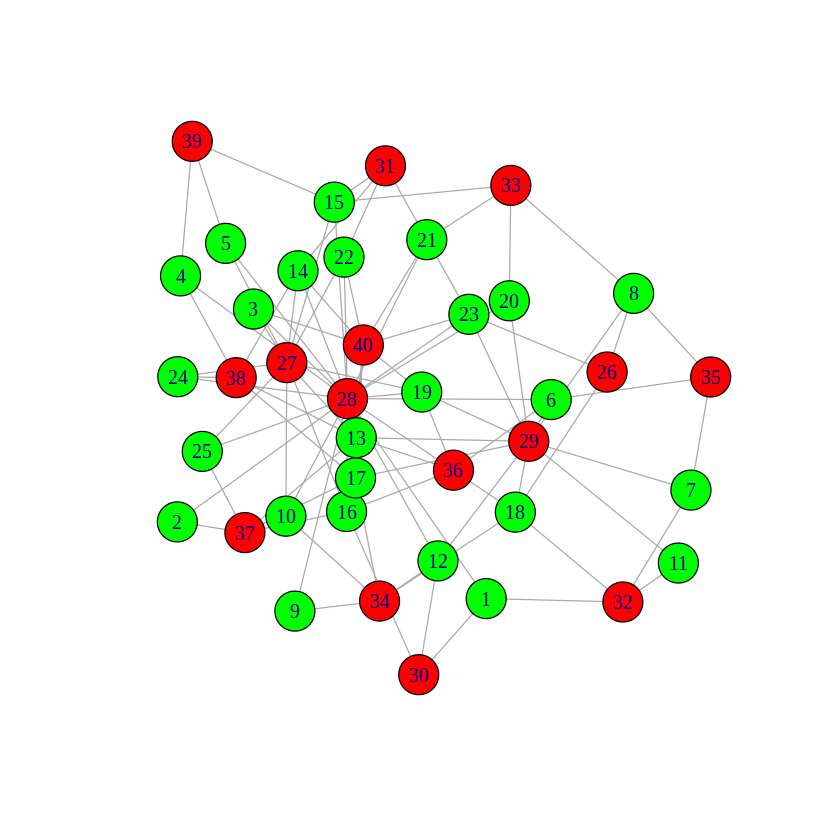

### 7. Представить сеть аффилированности в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов. Сделать выводы.

3,1,1,1,1,1,1,0,1,1,⋯,2,0,2,1,1,1,1,1,1,1
1,2,1,1,1,1,0,0,1,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,3,1,2,1,0,0,1,2,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,3,2,1,0,0,1,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,2,2,3,1,0,0,1,2,⋯,2,0,1,2,1,1,2,1,2,2
1,1,1,1,1,4,2,2,1,1,⋯,2,1,2,3,2,1,1,2,1,1
1,0,0,0,0,2,3,2,0,0,⋯,0,1,2,1,1,0,0,1,0,0
0,0,0,0,0,2,2,4,0,0,⋯,0,1,2,1,2,1,0,2,0,0
1,1,1,1,1,1,0,0,2,2,⋯,1,1,2,1,1,1,1,1,1,1
1,1,2,1,2,1,0,0,2,3,⋯,2,1,2,2,1,1,2,1,2,2
1,0,0,0,0,1,2,1,0,0,⋯,0,1,2,1,1,0,0,1,0,0


,X0,X0.1,X1,X1.1,X0.2,X0.3,X0.4,X0.5,X1.2,X0.6,X0.7,X0.8,X0.9,X0.10,X0.11
X0,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
X0.1,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
X1,2,11,21,7,3,4,2,3,4,1,4,4,4,3,8
X1.1,3,2,7,11,1,1,3,2,3,3,3,2,2,0,4
X0.2,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
X0.3,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
X0.4,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
X0.5,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
X1.2,1,1,4,3,1,0,1,0,5,0,0,1,1,0,1
X0.6,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


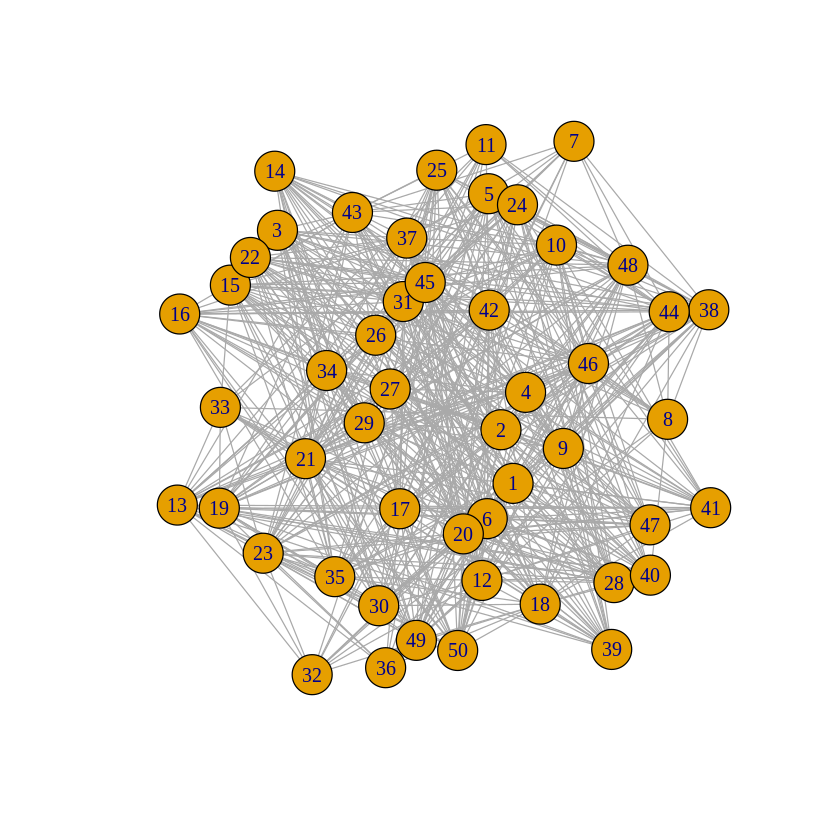

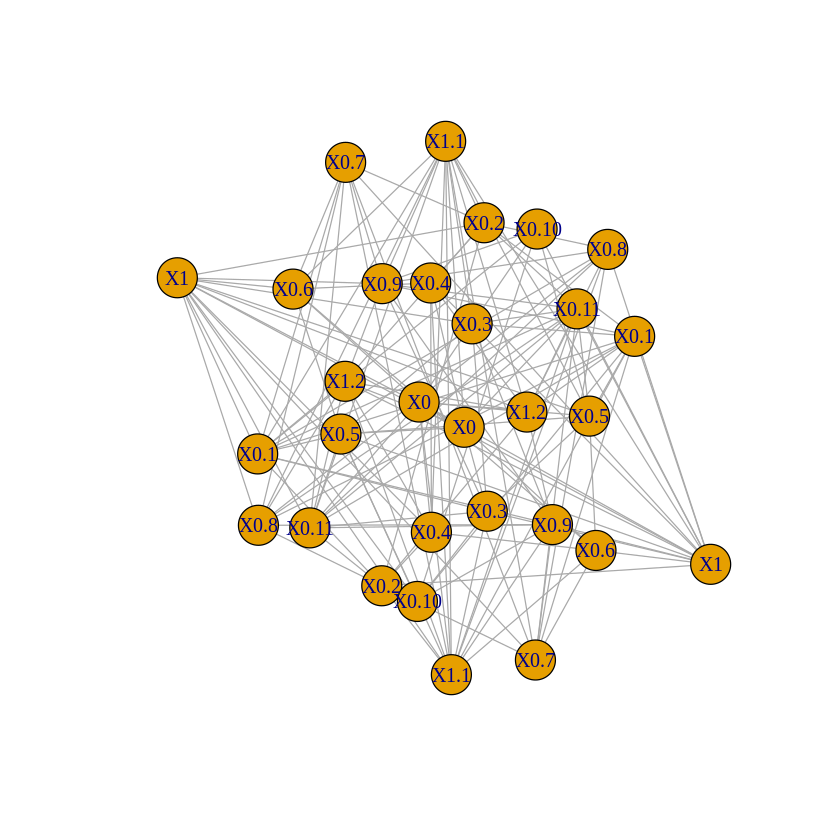

In [7]:
#Сеть соучастия
compl <- matrix2 %*% t(matrix2)
compl
compl_network <- graph.incidence(compl, mode='in', weighted=TRUE)
plot(compl_network, layout=layout_with_kk)


#Сеть перекрытия событий
event <- t(matrix2) %*% matrix2
event
event_network <- graph.incidence(event, mode='in', weighted=TRUE)
plot(event_network, layout=layout_with_kk)


### 8. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

In [8]:
#степень участия:
degreeOfPart <- compl[row(compl) == col(compl)]
for(i in 1:length(degreeOfPart)){
    cat("Актор", i, "связан с", degreeOfPart[i], "событиями\n")
}

#среднее количество событий, с которыми актор аффилирован
meanAmount <- sum(degreeOfPart) / length(degreeOfPart)
cat("Mean amout:", meanAmount)

Актор 1 связан с 3 событиями
Актор 2 связан с 2 событиями
Актор 3 связан с 3 событиями
Актор 4 связан с 3 событиями
Актор 5 связан с 3 событиями
Актор 6 связан с 4 событиями
Актор 7 связан с 3 событиями
Актор 8 связан с 4 событиями
Актор 9 связан с 2 событиями
Актор 10 связан с 3 событиями
Актор 11 связан с 2 событиями
Актор 12 связан с 4 событиями
Актор 13 связан с 7 событиями
Актор 14 связан с 5 событиями
Актор 15 связан с 5 событиями
Актор 16 связан с 6 событиями
Актор 17 связан с 5 событиями
Актор 18 связан с 5 событиями
Актор 19 связан с 5 событиями
Актор 20 связан с 3 событиями
Актор 21 связан с 3 событиями
Актор 22 связан с 4 событиями
Актор 23 связан с 5 событиями
Актор 24 связан с 3 событиями
Актор 25 связан с 3 событиями
Mean amout: 3.8

### 9. Вычислить размер и средний размер для каждого события. Сделать выводы.

In [9]:
#Размер
size <- event[row(event) == col(event)]
for(i in 1:length(size)){
    cat("Событие", i, "имеет размер", size[i], "\n")
}
#Средний размер
meanSize <- sum(size) / length(size)
cat("Mean size:", meanSize)

Событие 1 имеет размер 3 
Событие 2 имеет размер 11 
Событие 3 имеет размер 21 
Событие 4 имеет размер 11 
Событие 5 имеет размер 3 
Событие 6 имеет размер 4 
Событие 7 имеет размер 4 
Событие 8 имеет размер 4 
Событие 9 имеет размер 5 
Событие 10 имеет размер 3 
Событие 11 имеет размер 4 
Событие 12 имеет размер 5 
Событие 13 имеет размер 5 
Событие 14 имеет размер 3 
Событие 15 имеет размер 9 
Mean size: 6.333333

### 10. Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.

In [10]:
#Плотность для соотношения соучастия
densPart <- sum(compl) / (length(degreeOfPart) * (length(degreeOfPart) - 1))
cat("Плотность для соотношения соучастия:", densPart, '\n')

#Плотность для соотношения перекрытия
densEvent <- sum(event) / (length(size)* (length(size)-1))
cat("Плотность для соотношения перекрытия:", densEvent, '\n')


Плотность для соотношения соучастия: 1.565 
Плотность для соотношения перекрытия: 1.909524 


### 11. Определить диаметр сети аффилированности.

In [16]:
#Диаметр сети аффилированности
cat("Диаметр сети аффилированности: ", max(diameter(compl_network), diameter(event_network)) , '\n')

Диаметр сети аффилированности:  4 


## Выводы

В ходе выполнения работы получены знания о работе с подграфами, о сетях аффилированности (были разбиты на одномодальные сети), которые были подкреплены на практике. Следовательно, был произведён анализ показателей данной в условии сети.